In [1]:
import os
os.chdir('Retroformer/')
from utils.draw_utils import draw_mols
from utils.smiles_utils import canonical_smiles, canonical_smiles_with_am,\
clear_map_number, remove_am_without_canonical
from dataset import RetroDataset

from rdkit import Chem
from rdkit.Chem import Draw

In [42]:
import pandas as pd
dataset = pd.read_csv('data/typed_schneider50k/raw_test.csv')
dataset.set_index('id', drop =True, inplace = True)
dataset.head()

,class,reactants>reagents>production
id,,
US07928231B2,5,CC(C)(C)OC(=O)O[C:6]([O:5][C:2]([CH3:1])([CH3:...
US20090192322A1,5,CC(C)(C)OC(=O)O[C:6]([O:5][C:2]([CH3:1])([CH3:...
US20080146614A1,10,O=C1CCC(=O)N1[Br:1].[CH3:2][CH2:3][O:4][C:5](=...
US20120207729A1,5,CC(C)(C)OC(=O)O[C:6]([O:5][C:2]([CH3:1])([CH3:...
US20070003539A1,5,O=C(O[C:1](=[O:2])[C:3]([F:4])([F:5])[F:6])C(F...


In [41]:
dataset.shape

(40008, 2)

In [54]:
dataset.iloc[2:3].to_csv('data/typed_schneider50k/one_sample.csv')

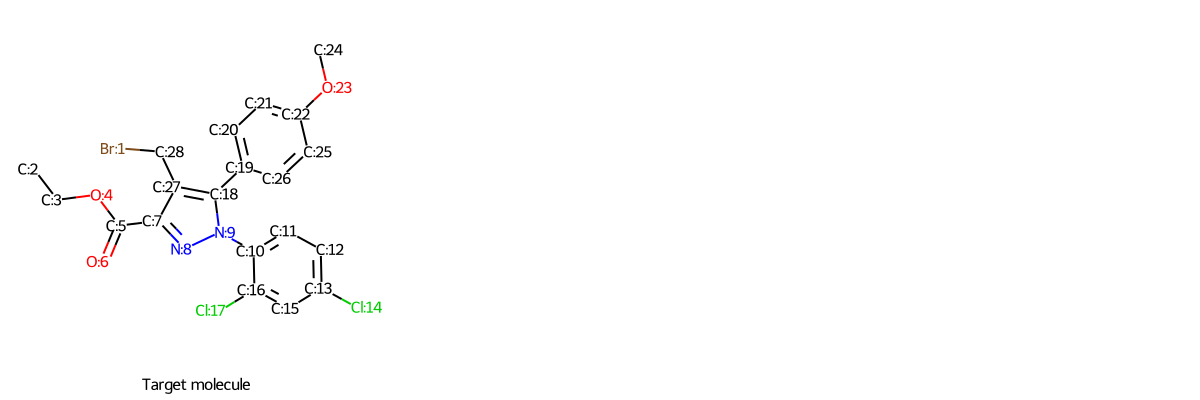

In [72]:
react, prod = dataset.iloc[2]['reactants>reagents>production'].split('>>')

p = canonical_smiles_with_am(prod)
p1 = clear_map_number(p)

draw_mols([p], highlight = False, size = (400, 400), num_mols = 3, legend = (['Target molecule']))

In [73]:
p1

'CCOC(=O)c1nn(-c2ccc(Cl)cc2Cl)c(-c2ccc(OC)cc2)c1CBr'

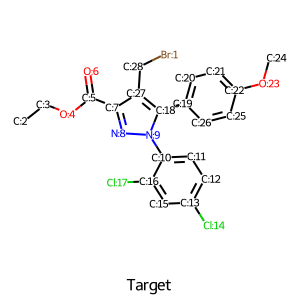

In [55]:
m = Chem.MolFromSmiles(prod)
Draw.MolToImage(m, legend =' Target')

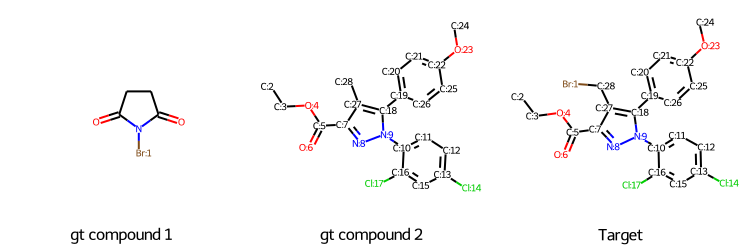

In [56]:
r1, r2 = react.split('.')
draw_mols([r1, r2, p], highlight = False, size = (250, 250), legend = ('gt compound 1', 'gt compound 2', 'Target'))

In [2]:
import pdb, sys, numpy as np, pickle, os

with open('intermediate/smal_test.pk',mode='rb') as f:
    data = pickle.load(f)

In [ ]:
data

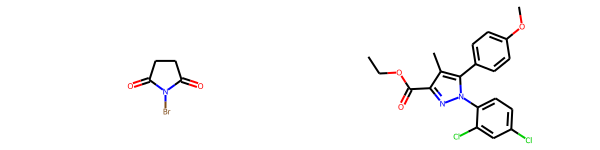

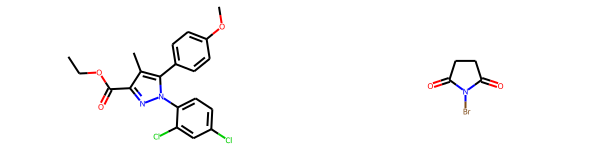

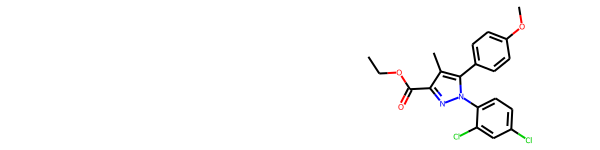

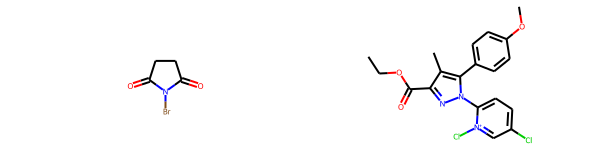

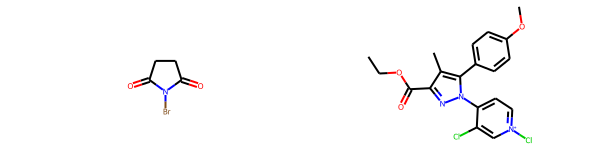

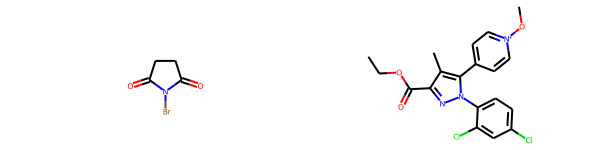

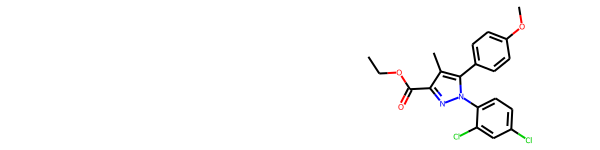

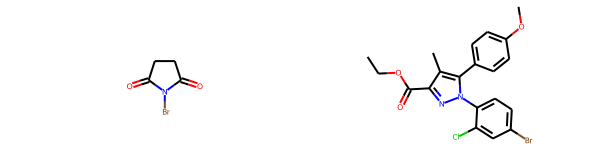

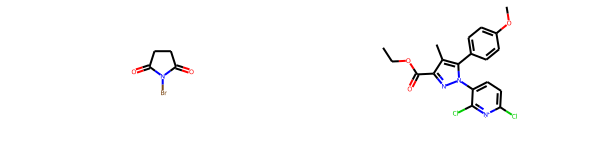

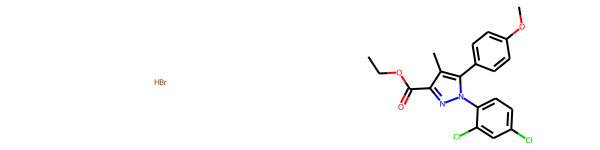

In [74]:
for react in data[1][0]:
    r1, r2 = react.split('.')
    #print(r1, r2)
    draw_mols([r1, r2], highlight = False, size = (300, 150), num_mols = 2,)# legend = ('pred compound 1', 'pred compound 2'))

In [3]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import DataStructs
import pandas as pd

,mol1,mol2,Mol1,Mol2
0,O=C1CCC(=O)N1Br,CCOC(=O)c1nn(-c2ccc(Cl)cc2Cl)c(-c2ccc(OC)cc2)c1C,,
1,CCOC(=O)c1nn(-c2ccc(Cl)cc2Cl)c(-c2ccc(OC)cc2)c1C,O=C1CCC(=O)N1Br,,
3,O=C1CCC(=O)N1Br,CCOC(=O)c1nn(-c2ccc(Cl)c[n+]2Cl)c(-c2ccc(OC)cc...,,
4,O=C1CCC(=O)N1Br,CCOC(=O)c1nn(-c2cc[n+](Cl)cc2Cl)c(-c2ccc(OC)cc...,,
5,O=C1CCC(=O)N1Br,CCOC(=O)c1nn(-c2ccc(Cl)cc2Cl)c(-c2cc[n+](OC)cc...,,
6,O=C1CC[C@@H](=O)N1Br,CCOC(=O)c1nn(-c2ccc(Cl)cc2Cl)c(-c2ccc(OC)cc2)c1C,None,
7,O=C1CCC(=O)N1Br,CCOC(=O)c1nn(-c2ccc(Br)cc2Cl)c(-c2ccc(OC)cc2)c1C,,
8,O=C1CCC(=O)N1Br,CCOC(=O)c1nn(-c2ccc(Cl)[n+]c2Cl)c(-c2ccc(OC)cc...,,
9,Br,CCOC(=O)c1nn(-c2ccc(Cl)cc2Cl)c(-c2ccc(OC)cc2)c1C,,

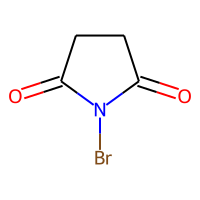
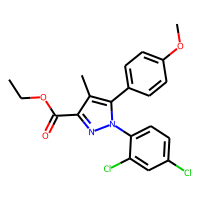
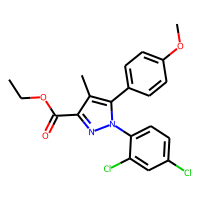
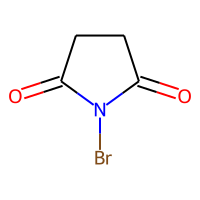
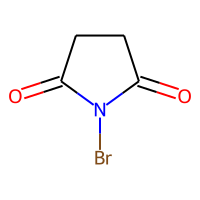
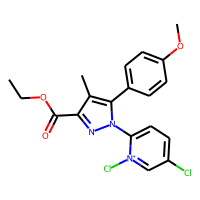
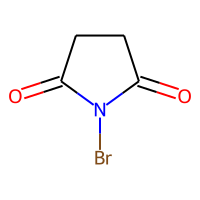
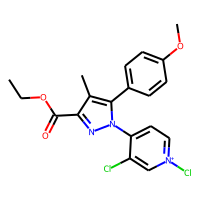
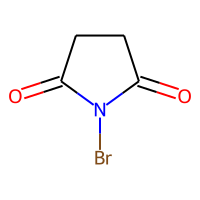
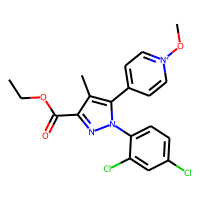
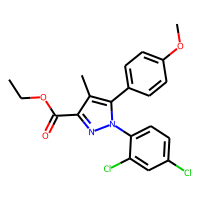
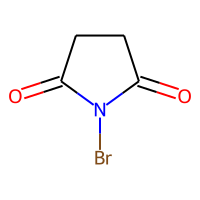
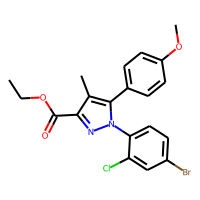
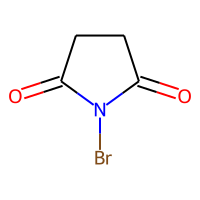
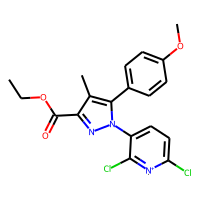
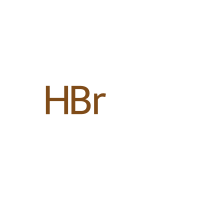
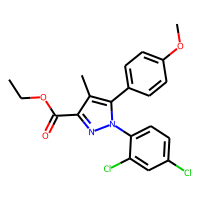

In [4]:
pred_df = pd.DataFrame(data[1][0], columns = ['SMILES'])
pred_df['mol1'] = pred_df.SMILES.apply(lambda x: x.split('.')[0])
pred_df['mol2'] = pred_df.SMILES.apply(lambda x: x.split('.')[-1])
pred_df.drop('SMILES', axis = 1, inplace = True)
pred_df.drop(2, axis = 0, inplace = True)
PandasTools.AddMoleculeColumnToFrame(pred_df,'mol1','Mol1',includeFingerprints=True)
PandasTools.AddMoleculeColumnToFrame(pred_df,'mol2','Mol2',includeFingerprints=True)
#PandasTools.AddMoleculeColumnToFrame(predict,'SMILES','Molecule',includeFingerprints=True)
pred_df.head(10)